In [1]:
import  numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('result_csv')

In [3]:
df

,Unnamed: 0,Bedrooms,Sqft,Status,Persqft,Prices,Location,City
0,0,4 BHK,1930,Under Construction,"7,700 / sq ft",1.48 Cr,Patancheru,Hyderabad
1,1,4 BHK,4157,Under Construction,"7,200 / sq ft",2.99 Cr,Tukkuguda,Hyderabad
2,2,4 BHK,3400,Under Construction,"12,000 / sq ft",4.08 Cr,Bachupally,Hyderabad
3,3,4 BHK,2701,Under Construction,"5,200 / sq ft",1.4 Cr,Maheshwaram,Hyderabad
4,4,4 BHK,6125,Under Construction,"12,000 / sq ft",7.35 Cr,Mamidipally,Hyderabad
...,...,...,...,...,...,...,...,...
1035,1035,3 BHK,1800,Ready to move,"3,611 / sq ft",65 L,Neral,Mumbai
1036,1036,2 BHK,1111,Under Construction,"3,915 / sq ft",43.5 L,Neral,Mumbai
1037,1037,2 BHK,1850,Ready to move,"6,756 / sq ft",1.25 Cr,Kharghar,Mumbai
1038,1038,3 BHK,3280,Ready to move,"21,341 / sq ft",7 Cr,Thane West,Mumbai


In [4]:
df["Prices"]=df["Prices"].replace({"L":"*1e5",'Cr':'*1e7'},regex=True).map(pd.eval).astype(int)

In [5]:
df['Bedrooms'] = [re.sub('BHK','',i) for i in df['Bedrooms']]

In [6]:
df['Persqft'] = [re.sub('/ sq ft','',i) for i in df['Persqft']]

In [7]:
df.drop(columns = 'Unnamed: 0',inplace = True)

In [8]:
df

,Bedrooms,Sqft,Status,Persqft,Prices,Location,City
0,4,1930,Under Construction,"7,700",14800000,Patancheru,Hyderabad
1,4,4157,Under Construction,"7,200",29900000,Tukkuguda,Hyderabad
2,4,3400,Under Construction,"12,000",40800000,Bachupally,Hyderabad
3,4,2701,Under Construction,"5,200",14000000,Maheshwaram,Hyderabad
4,4,6125,Under Construction,"12,000",73500000,Mamidipally,Hyderabad
...,...,...,...,...,...,...,...
1035,3,1800,Ready to move,"3,611",6500000,Neral,Mumbai
1036,2,1111,Under Construction,"3,915",4350000,Neral,Mumbai
1037,2,1850,Ready to move,"6,756",12500000,Kharghar,Mumbai
1038,3,3280,Ready to move,"21,341",70000000,Thane West,Mumbai


In [9]:
df = df.drop_duplicates()

In [10]:
df = df.reset_index(drop = True)

In [11]:
df['Persqft'] = [re.sub(',','',i) for i in df['Persqft']]

In [12]:
df

,Bedrooms,Sqft,Status,Persqft,Prices,Location,City
0,4,1930,Under Construction,7700,14800000,Patancheru,Hyderabad
1,4,4157,Under Construction,7200,29900000,Tukkuguda,Hyderabad
2,4,3400,Under Construction,12000,40800000,Bachupally,Hyderabad
3,4,2701,Under Construction,5200,14000000,Maheshwaram,Hyderabad
4,4,6125,Under Construction,12000,73500000,Mamidipally,Hyderabad
...,...,...,...,...,...,...,...
842,3,1800,Ready to move,3611,6500000,Neral,Mumbai
843,2,1111,Under Construction,3915,4350000,Neral,Mumbai
844,2,1850,Ready to move,6756,12500000,Kharghar,Mumbai
845,3,3280,Ready to move,21341,70000000,Thane West,Mumbai


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Bedrooms  847 non-null    object
 1   Sqft      847 non-null    int64 
 2   Status    847 non-null    object
 3   Persqft   847 non-null    object
 4   Prices    847 non-null    int32 
 5   Location  847 non-null    object
 6   City      847 non-null    object
dtypes: int32(1), int64(1), object(5)
memory usage: 43.1+ KB


In [14]:
df.isna().sum()

Bedrooms    0
Sqft        0
Status      0
Persqft     0
Prices      0
Location    0
City        0
dtype: int64

In [15]:
df['Persqft'] = df['Persqft'].astype('int')

In [16]:
df

,Bedrooms,Sqft,Status,Persqft,Prices,Location,City
0,4,1930,Under Construction,7700,14800000,Patancheru,Hyderabad
1,4,4157,Under Construction,7200,29900000,Tukkuguda,Hyderabad
2,4,3400,Under Construction,12000,40800000,Bachupally,Hyderabad
3,4,2701,Under Construction,5200,14000000,Maheshwaram,Hyderabad
4,4,6125,Under Construction,12000,73500000,Mamidipally,Hyderabad
...,...,...,...,...,...,...,...
842,3,1800,Ready to move,3611,6500000,Neral,Mumbai
843,2,1111,Under Construction,3915,4350000,Neral,Mumbai
844,2,1850,Ready to move,6756,12500000,Kharghar,Mumbai
845,3,3280,Ready to move,21341,70000000,Thane West,Mumbai


In [17]:
df['Bedrooms'] = df['Bedrooms'].astype('int')

In [18]:
df1=df[df['Bedrooms']<=6]
dfsb=df1[df1['Bedrooms']>=1]


#df1=(df['Bedrooms']>=2)&(df['Bedrooms']<=6)

#df[df1].drop(columns='index',inplace=True)
dfsb.reset_index()

,index,Bedrooms,Sqft,Status,Persqft,Prices,Location,City
0,0,4,1930,Under Construction,7700,14800000,Patancheru,Hyderabad
1,1,4,4157,Under Construction,7200,29900000,Tukkuguda,Hyderabad
2,2,4,3400,Under Construction,12000,40800000,Bachupally,Hyderabad
3,3,4,2701,Under Construction,5200,14000000,Maheshwaram,Hyderabad
4,4,4,6125,Under Construction,12000,73500000,Mamidipally,Hyderabad
...,...,...,...,...,...,...,...,...
836,842,3,1800,Ready to move,3611,6500000,Neral,Mumbai
837,843,2,1111,Under Construction,3915,4350000,Neral,Mumbai
838,844,2,1850,Ready to move,6756,12500000,Kharghar,Mumbai
839,845,3,3280,Ready to move,21341,70000000,Thane West,Mumbai


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Bedrooms  847 non-null    int32 
 1   Sqft      847 non-null    int64 
 2   Status    847 non-null    object
 3   Persqft   847 non-null    int32 
 4   Prices    847 non-null    int32 
 5   Location  847 non-null    object
 6   City      847 non-null    object
dtypes: int32(3), int64(1), object(3)
memory usage: 36.5+ KB


In [20]:
df.describe()

,Bedrooms,Sqft,Persqft,Prices
count,847.000000,847.000000,847.000000,8.470000e+02
mean,3.355372,2758.159386,9262.526564,3.168020e+07
std,1.048489,1531.175474,9704.497866,5.700389e+07
min,1.000000,410.000000,650.000000,1.300000e+06
25%,3.000000,1618.500000,5020.000000,8.382500e+06
50%,3.000000,2500.000000,6575.000000,1.680000e+07
75%,4.000000,3498.000000,9509.500000,3.075000e+07
max,10.000000,12400.000000,90909.000000,6.000000e+08


In [21]:
df

,Bedrooms,Sqft,Status,Persqft,Prices,Location,City
0,4,1930,Under Construction,7700,14800000,Patancheru,Hyderabad
1,4,4157,Under Construction,7200,29900000,Tukkuguda,Hyderabad
2,4,3400,Under Construction,12000,40800000,Bachupally,Hyderabad
3,4,2701,Under Construction,5200,14000000,Maheshwaram,Hyderabad
4,4,6125,Under Construction,12000,73500000,Mamidipally,Hyderabad
...,...,...,...,...,...,...,...
842,3,1800,Ready to move,3611,6500000,Neral,Mumbai
843,2,1111,Under Construction,3915,4350000,Neral,Mumbai
844,2,1850,Ready to move,6756,12500000,Kharghar,Mumbai
845,3,3280,Ready to move,21341,70000000,Thane West,Mumbai


 ### univariant analysis

Text(0.5, 0, 'Bedrooms')

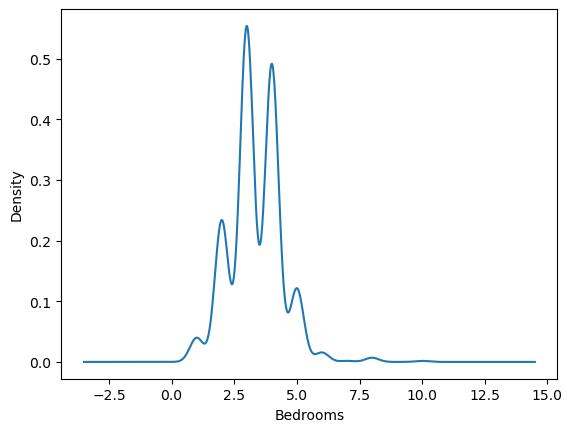

In [22]:
df['Bedrooms'].plot(kind = 'kde')
plt.xlabel('Bedrooms')

Text(0.5, 1.0, 'Distribution of cities')

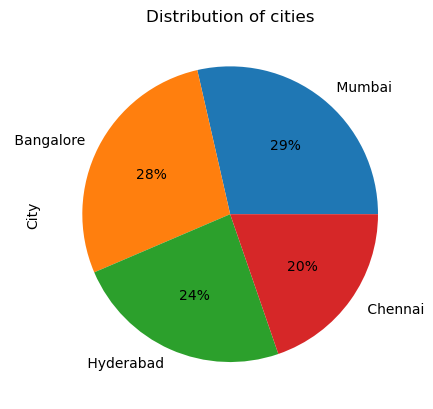

In [23]:
df['City'].value_counts().plot(kind = 'pie',autopct = ('%0.0f%%'))
plt.title('Distribution of cities')

In [24]:
city_df = df['City'].value_counts()
city_df

 Mumbai       242
 Bangalore    236
 Hyderabad    202
 Chennai      167
Name: City, dtype: int64

Text(0, 0.5, 'count')

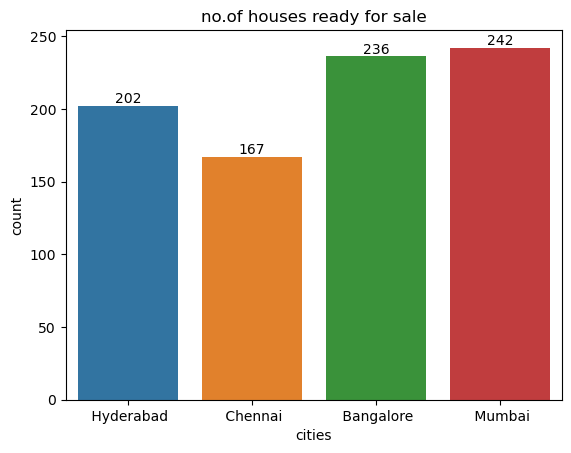

In [25]:
plot=sns.countplot(x=df['City'],data=df, linewidth = 3)
for label in plot.containers:
    plot.bar_label(label)
plt.title('no.of houses ready for sale')
plt.xlabel('cities')
plt.ylabel('count')

<Axes: ylabel='Status'>

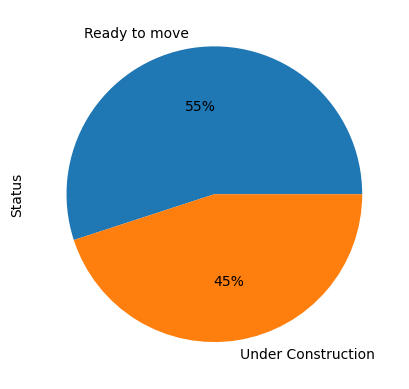

In [26]:
status_d=df['Status'].value_counts().plot(kind='pie',autopct = ('%0.0f%%'))
status_d

Text(0, 0.5, 'counts')

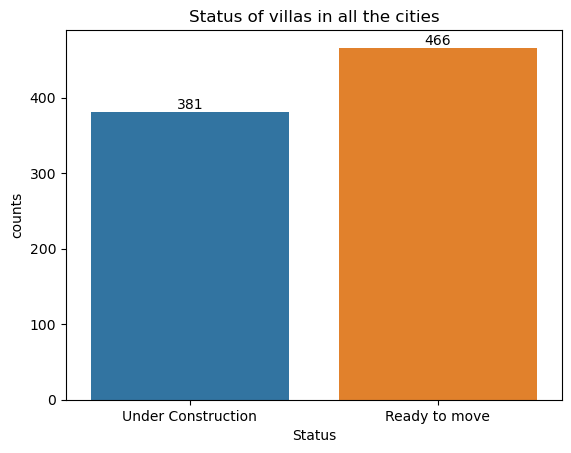

In [27]:
plot=sns.countplot(x=df['Status'],data=df,alpha=1,linewidth=3)
for label in plot.containers:
    plot.bar_label(label)

plt.title('Status of villas in all the cities')
plt.ylabel('counts')


Text(0.5, 1.0, 'Histogram of Persqft')

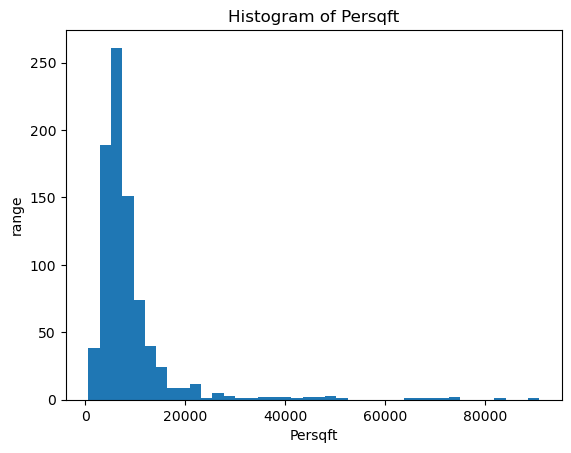

In [28]:
plt.hist(dfsb['Persqft'],bins = 40)
plt.xlabel('Persqft')
plt.ylabel('range')
plt.title('Histogram of Persqft')

Text(0.5, 1.0, 'histogram of plot of sqft')

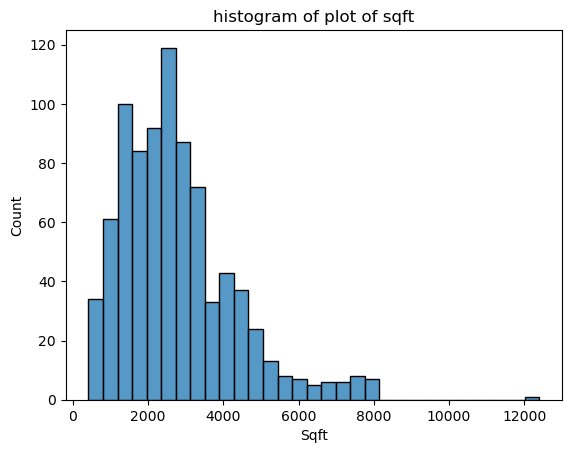

In [29]:
sns.histplot(data=df,x='Sqft')
plt.xlabel('Sqft')
#plt.ylabel('Prices')
plt.title('histogram of plot of sqft')

In [30]:
x = dfsb.loc[dfsb['City'].str.contains('Hyderabad')]
x


,Bedrooms,Sqft,Status,Persqft,Prices,Location,City
0,4,1930,Under Construction,7700,14800000,Patancheru,Hyderabad
1,4,4157,Under Construction,7200,29900000,Tukkuguda,Hyderabad
2,4,3400,Under Construction,12000,40800000,Bachupally,Hyderabad
3,4,2701,Under Construction,5200,14000000,Maheshwaram,Hyderabad
4,4,6125,Under Construction,12000,73500000,Mamidipally,Hyderabad
...,...,...,...,...,...,...,...
197,3,3200,Ready to move,5468,17500000,Bachupally,Hyderabad
198,5,3300,Ready to move,5606,18500000,Shankarpally Road,Hyderabad
199,4,3500,Under Construction,5714,20000000,Mokila,Hyderabad
200,5,5255,Under Construction,13967,73400000,Tellapur,Hyderabad


C:\Users\Asus\AppData\Local\Temp\ipykernel_18652\2877834721.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.barplot(x='Status',y='Prices',data=x,ci = None,hue=df['Bedrooms'])


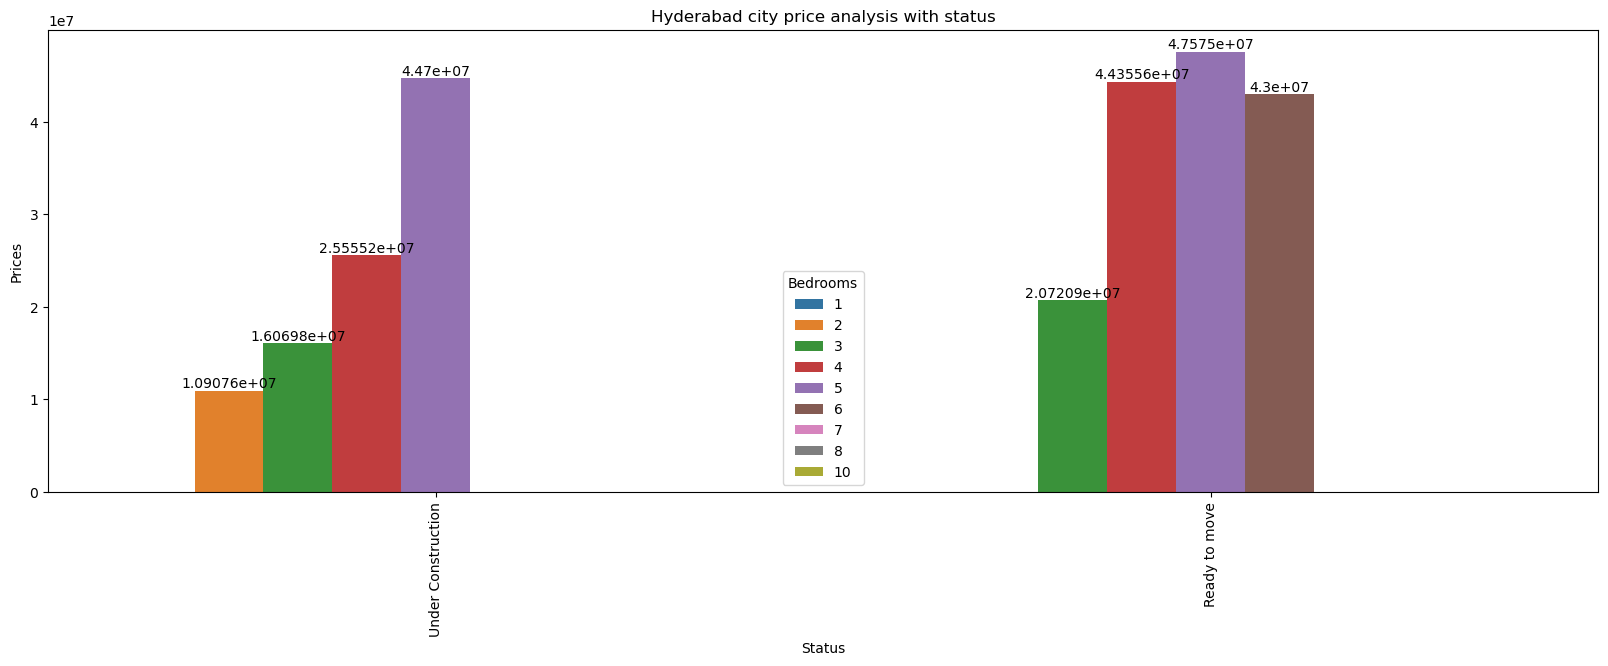

In [31]:
plt.figure(figsize=(20,6))
ax=sns.barplot(x='Status',y='Prices',data=x,ci = None,hue=df['Bedrooms'])
for label in ax.containers:
    ax.bar_label(label)
plt.title("Hyderabad city price analysis with status")
plt.xticks(rotation = 90)
plt.show()

In [32]:
flt =  (x['Bedrooms']==4 ) 


x[flt].reset_index()

,index,Bedrooms,Sqft,Status,Persqft,Prices,Location,City
0,0,4,1930,Under Construction,7700,14800000,Patancheru,Hyderabad
1,1,4,4157,Under Construction,7200,29900000,Tukkuguda,Hyderabad
2,2,4,3400,Under Construction,12000,40800000,Bachupally,Hyderabad
3,3,4,2701,Under Construction,5200,14000000,Maheshwaram,Hyderabad
4,4,4,6125,Under Construction,12000,73500000,Mamidipally,Hyderabad
...,...,...,...,...,...,...,...,...
87,189,4,2488,Ready to move,5024,12500000,Kardhanur,Hyderabad
88,190,4,2480,Ready to move,4838,12000000,Bhanur,Hyderabad
89,191,4,2480,Ready to move,5040,12500000,Pati,Hyderabad
90,192,4,2450,Ready to move,4897,12000000,Kollur,Hyderabad


In [33]:
df1= x[flt][x[flt]['Prices'] <= 30000000]
df1

,Bedrooms,Sqft,Status,Persqft,Prices,Location,City
0,4,1930,Under Construction,7700,14800000,Patancheru,Hyderabad
1,4,4157,Under Construction,7200,29900000,Tukkuguda,Hyderabad
3,4,2701,Under Construction,5200,14000000,Maheshwaram,Hyderabad
5,4,2130,Under Construction,7700,16399999,Patancheru,Hyderabad
7,4,3060,Under Construction,5199,15900000,Maheshwaram,Hyderabad
...,...,...,...,...,...,...,...
189,4,2488,Ready to move,5024,12500000,Kardhanur,Hyderabad
190,4,2480,Ready to move,4838,12000000,Bhanur,Hyderabad
191,4,2480,Ready to move,5040,12500000,Pati,Hyderabad
192,4,2450,Ready to move,4897,12000000,Kollur,Hyderabad


In [34]:
df1['Prices'].mean().round(2)

17427655.67

In [35]:
df1['Prices'].median()

16500000.0

In [36]:
df1['Prices'].min()

5900000

In [37]:
df1['Prices'].max()

30000000

C:\Users\Asus\AppData\Local\Temp\ipykernel_18652\2064648989.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  plot=sns.barplot(x='Location',y='Prices',data=df1,ci=None)


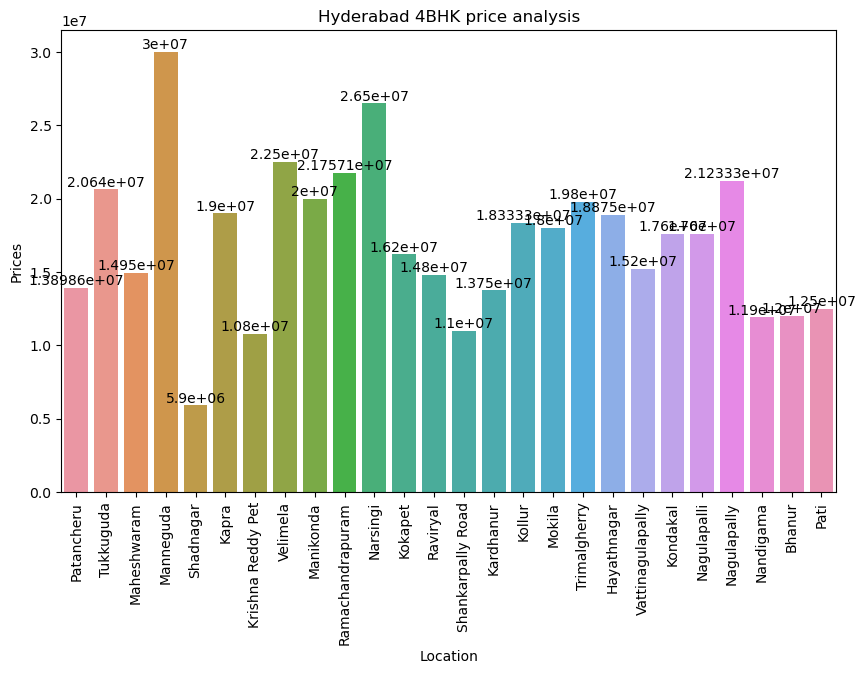

In [38]:
plt.figure(figsize=(10,6))
plot=sns.barplot(x='Location',y='Prices',data=df1,ci=None)
for label in plot.containers:
    plot.bar_label(label)
plt.title("Hyderabad 4BHK price analysis")
plt.xticks(rotation=90)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


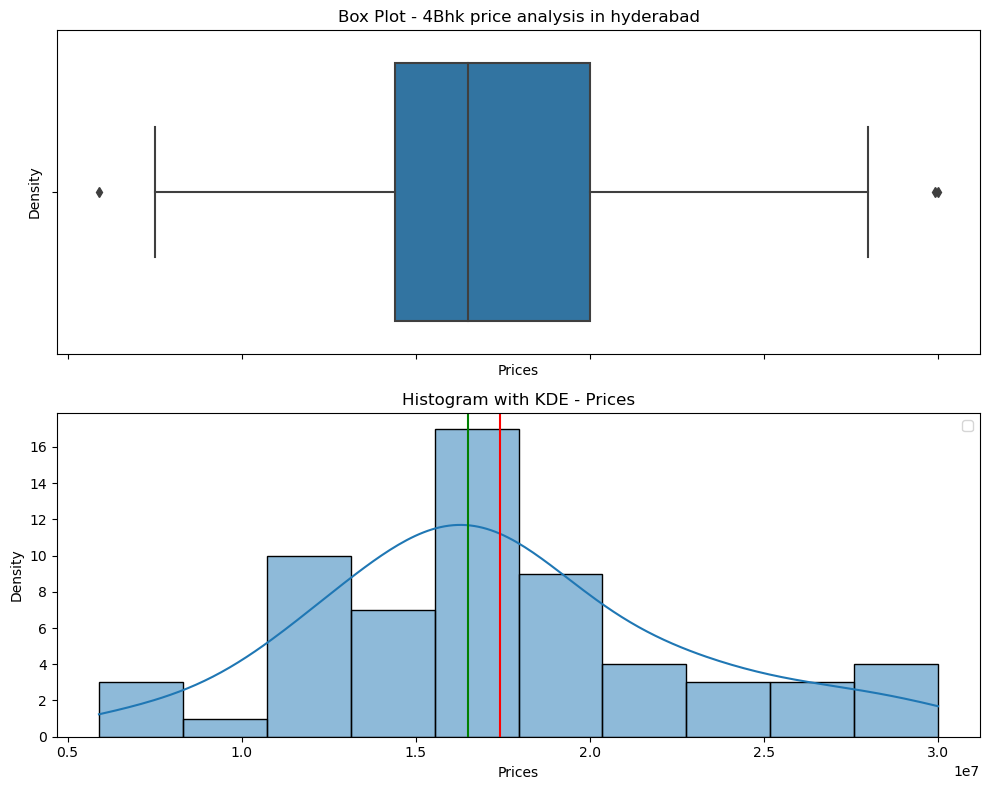

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

# Box plot
sns.boxplot(data=df1, x='Prices', ax=axes[0])
axes[0].set_ylabel('Density')
axes[0].set_title('Box Plot - 4Bhk price analysis in hyderabad')
axes[0].tick_params(axis='x', rotation=90)

# Histogram with KDE
sns.histplot(data=df1, x='Prices', kde=True, ax=axes[1],bins=10)
axes[1].set_xlabel('Prices')
axes[1].set_ylabel('Density')
axes[1].set_title('Histogram with KDE - Prices')
plt.axvline(df1['Prices'].mean(),color='red')
plt.axvline(df1['Prices'].median(),color='green')
plt.legend()

plt.tight_layout()
plt.show()

In [40]:
flt2 = (x['Bedrooms']==3)
x.loc[flt2].reset_index()

,index,Bedrooms,Sqft,Status,Persqft,Prices,Location,City
0,12,3,2524,Under Construction,6141,15500000,Kompally,Hyderabad
1,16,3,2100,Under Construction,4550,9555000,IDA Pashamylaram,Hyderabad
2,18,3,1630,Under Construction,7730,12600000,Patancheru,Hyderabad
3,19,3,1940,Ready to move,11082,21500000,Kowkur,Hyderabad
4,24,3,2184,Under Construction,5998,13100000,Pasumamula,Hyderabad
...,...,...,...,...,...,...,...,...
85,193,3,2683,Under Construction,6500,17400000,Pati,Hyderabad
86,194,3,4580,Under Construction,6500,29700000,Pati,Hyderabad
87,195,3,2500,Under Construction,6000,15000000,Rameshwaram Banda,Hyderabad
88,196,3,2500,Under Construction,6000,15000000,Patancheru,Hyderabad


In [41]:
df2=x[flt2][x[flt2]['Prices']<50000000]
df2.reset_index()

,index,Bedrooms,Sqft,Status,Persqft,Prices,Location,City
0,12,3,2524,Under Construction,6141,15500000,Kompally,Hyderabad
1,16,3,2100,Under Construction,4550,9555000,IDA Pashamylaram,Hyderabad
2,18,3,1630,Under Construction,7730,12600000,Patancheru,Hyderabad
3,19,3,1940,Ready to move,11082,21500000,Kowkur,Hyderabad
4,24,3,2184,Under Construction,5998,13100000,Pasumamula,Hyderabad
...,...,...,...,...,...,...,...,...
84,193,3,2683,Under Construction,6500,17400000,Pati,Hyderabad
85,194,3,4580,Under Construction,6500,29700000,Pati,Hyderabad
86,195,3,2500,Under Construction,6000,15000000,Rameshwaram Banda,Hyderabad
87,196,3,2500,Under Construction,6000,15000000,Patancheru,Hyderabad


In [42]:
df2['Prices'].mean().round(2)

16550033.7

In [43]:
df2['Prices'].median()

16700000.0

In [44]:
df2['Prices'].max()

37000000

In [45]:
df2['Prices'].min()

1300000

C:\Users\Asus\AppData\Local\Temp\ipykernel_18652\1626498024.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  plot=sns.barplot(x='Location',y='Prices',data=x[flt2],ci = None)


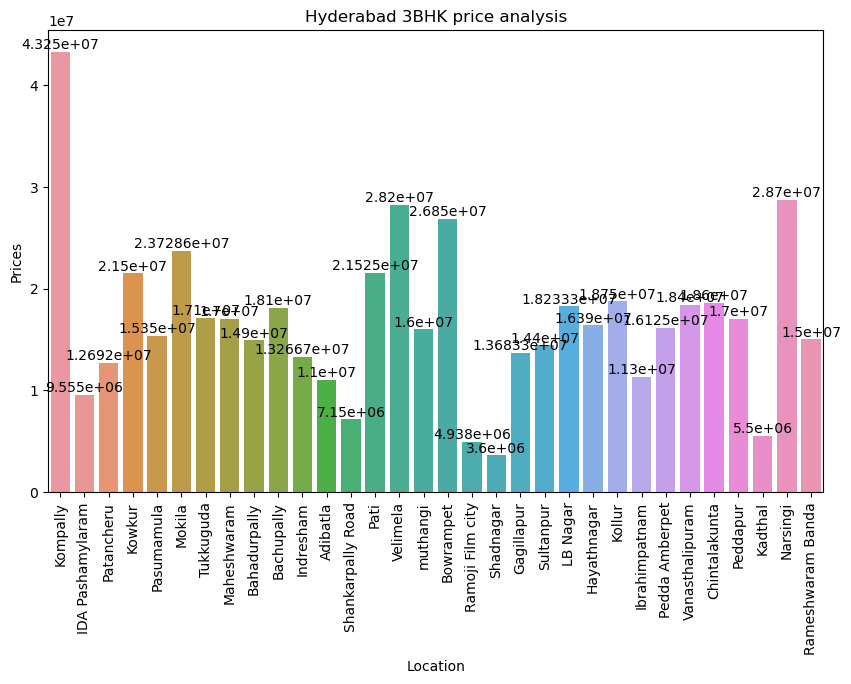

In [46]:
plt.figure(figsize=(10,6))
plot=sns.barplot(x='Location',y='Prices',data=x[flt2],ci = None)
for label in plot.containers:
    plot.bar_label(label)
    

plt.title("Hyderabad 3BHK price analysis")
plt.xticks(rotation=90)
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_18652\1359255097.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(data=df2[flt2], x='Prices', kde=True, ax=axes[1])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


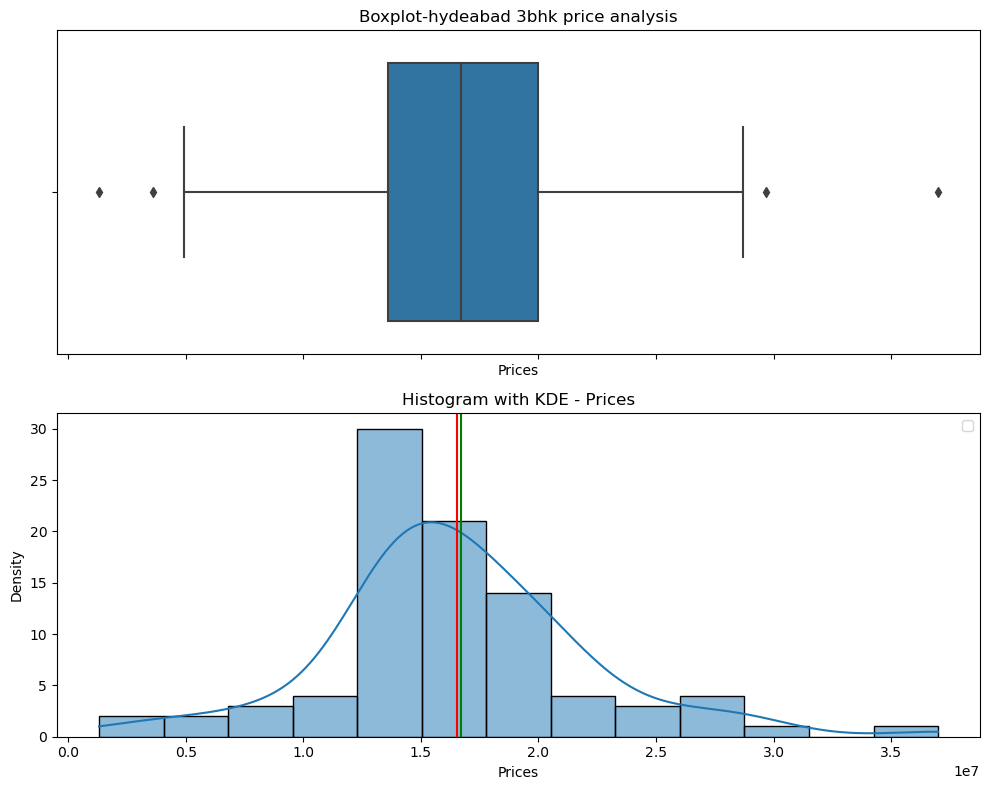

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

# Box plot
sns.boxplot(data=df2, x='Prices', ax=axes[0])
axes[0].set_xlabel('Prices')
axes[0].set_title('Boxplot-hydeabad 3bhk price analysis')

# Histogram with KDE
sns.histplot(data=df2[flt2], x='Prices', kde=True, ax=axes[1])
axes[1].set_xlabel('Prices')
axes[1].set_ylabel('Density')
axes[1].set_title('Histogram with KDE - Prices')


plt.axvline(df2['Prices'].mean(),color='red')
plt.axvline(df2['Prices'].median(),color='green')
plt.legend()

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'scatter plot- price with sqft')

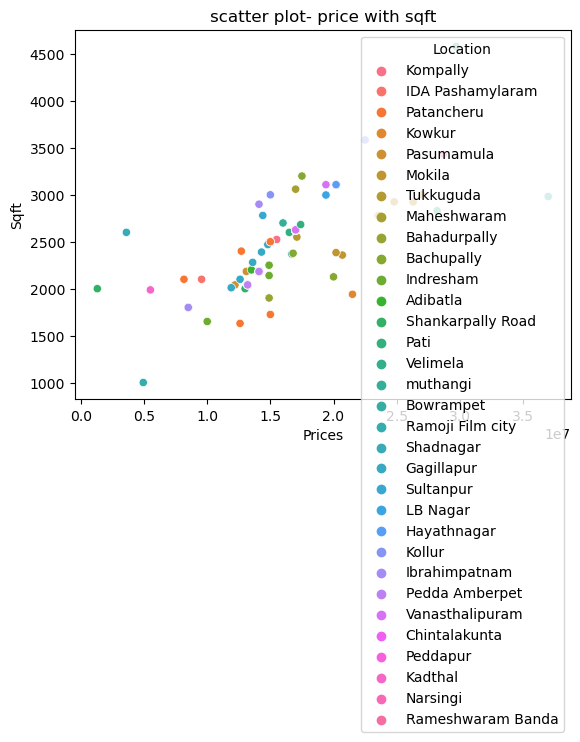

In [48]:
sns.scatterplot(x=df2['Prices'],y=df2['Sqft'],hue=df2['Location'])
plt.title('scatter plot- price with sqft')

In [49]:
y = df.loc[df['City'].str.contains('Mumbai')]
y.reset_index()

,index,Bedrooms,Sqft,Status,Persqft,Prices,Location,City
0,605,5,2921,Under Construction,6813,19900000,Boisar,Mumbai
1,606,3,2187,Under Construction,6813,14900000,Boisar,Mumbai
2,607,1,410,Ready to move,4512,1850000,Neral,Mumbai
3,608,2,1500,Ready to move,5000,7500000,Khardi,Mumbai
4,609,1,625,Ready to move,2960,1850000,Neral,Mumbai
...,...,...,...,...,...,...,...,...
237,842,3,1800,Ready to move,3611,6500000,Neral,Mumbai
238,843,2,1111,Under Construction,3915,4350000,Neral,Mumbai
239,844,2,1850,Ready to move,6756,12500000,Kharghar,Mumbai
240,845,3,3280,Ready to move,21341,70000000,Thane West,Mumbai


In [50]:
y['Persqft'].median()

5872.5

In [51]:
flt3 = (y['Bedrooms']==2) 
y[flt3].reset_index()

,index,Bedrooms,Sqft,Status,Persqft,Prices,Location,City
0,608,2,1500,Ready to move,5000,7500000,Khardi,Mumbai
1,615,2,1580,Ready to move,4332,6845000,Virar,Mumbai
2,618,2,1500,Ready to move,4000,6000000,Vasai,Mumbai
3,619,2,1400,Ready to move,8214,11500000,Sector 16 A,Mumbai
4,628,2,1850,Ready to move,5945,11000000,Neral,Mumbai
...,...,...,...,...,...,...,...,...
72,839,2,800,Ready to move,5250,4200000,Neral,Mumbai
73,840,2,1600,Ready to move,3750,6000000,Naigaon East,Mumbai
74,841,2,900,Ready to move,4223,3800000,Neral,Mumbai
75,843,2,1111,Under Construction,3915,4350000,Neral,Mumbai


In [52]:

df3=y[flt3][y[flt3]['Prices']<5000000]

In [53]:
df3['Prices'].max()

4999000

In [54]:
df3['Prices'].mean().round(2)

4267370.33

In [55]:
df3['Prices'].median()

4310000.0

In [56]:
df3['Prices'].min()

3300000

C:\Users\Asus\AppData\Local\Temp\ipykernel_18652\2696227948.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  plot=sns.barplot(x='Location',y='Prices',data=y[flt3],ci=None)


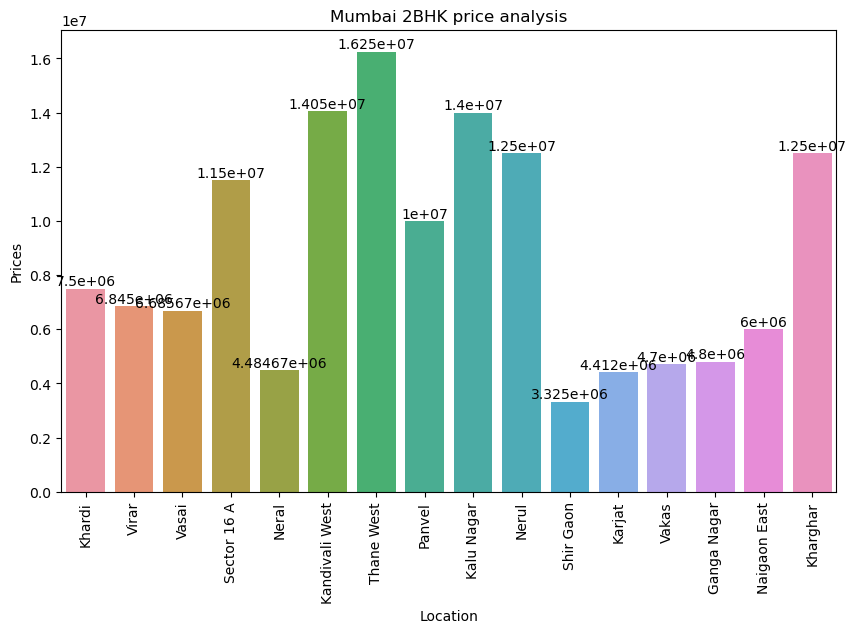

In [57]:
plt.figure(figsize=(10,6))
plot=sns.barplot(x='Location',y='Prices',data=y[flt3],ci=None)
for label in plot.containers:
    plot.bar_label(label)
    

plt.title("Mumbai 2BHK price analysis")
plt.xticks(rotation=90)
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_18652\2453108824.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(data=df3[flt3], x='Prices', ax=axes[0])
C:\Users\Asus\AppData\Local\Temp\ipykernel_18652\2453108824.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(data=df3[flt3], x='Prices', kde=True, ax=axes[1],bins=15)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


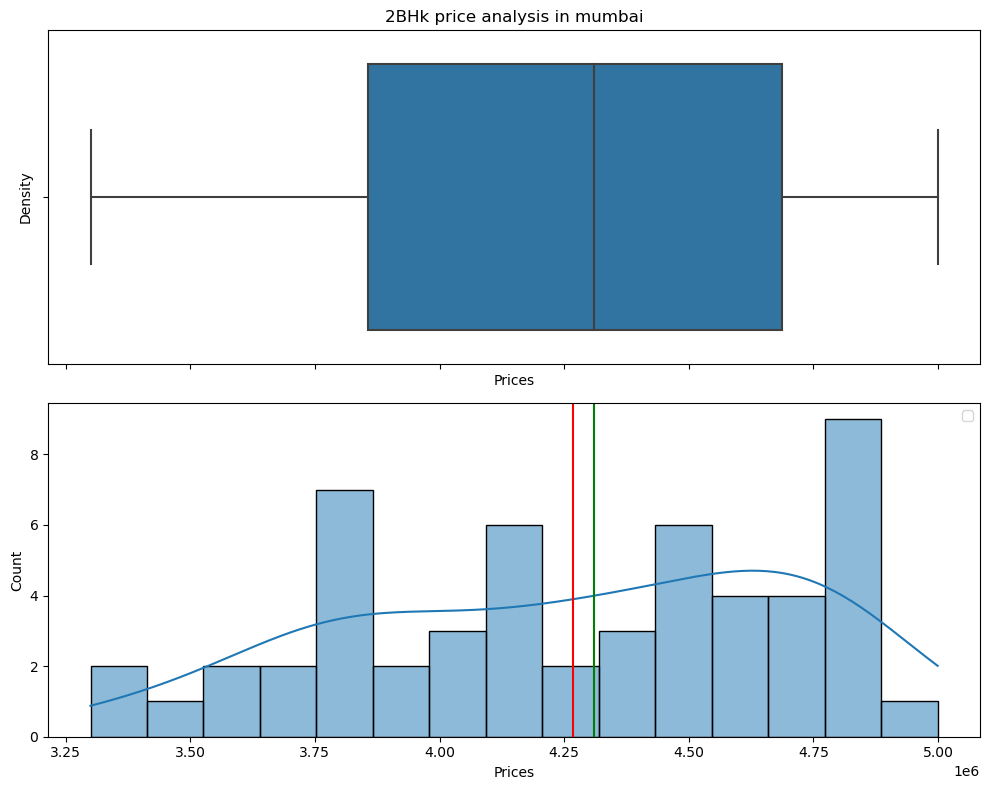

In [58]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

# Box plot
sns.boxplot(data=df3[flt3], x='Prices', ax=axes[0])
axes[0].set_ylabel('Density')
axes[0].set_title('Box Plot - 2BHK price analysis in Mumbai')
axes[0].tick_params(axis='x', rotation=90)

# Histogram with KDE
sns.histplot(data=df3[flt3], x='Prices', kde=True, ax=axes[1],bins=15)
axes[0].set_xlabel('Prices')
axes[0].set_ylabel('Density')
axes[0].set_title('2BHk price analysis in mumbai')


plt.axvline(df3['Prices'].mean(),color='red')
plt.axvline(df3['Prices'].median(),color='green')
plt.legend()

plt.tight_layout()
plt.show()

In [59]:
flt4 = (y['Bedrooms']==3)
y.loc[flt4].reset_index()

,index,Bedrooms,Sqft,Status,Persqft,Prices,Location,City
0,606,3,2187,Under Construction,6813,14900000,Boisar,Mumbai
1,614,3,3116,Under Construction,11777,36700000,Bhiwandi,Mumbai
2,620,3,1300,Ready to move,12307,16000000,Vasai,Mumbai
3,622,3,5000,Ready to move,4080,20400000,Thane West,Mumbai
4,623,3,1500,Ready to move,14000,21000000,Virar West,Mumbai
...,...,...,...,...,...,...,...,...
62,837,3,1120,Ready to move,5357,6000000,Neral,Mumbai
63,838,3,900,Ready to move,6111,5500000,Neral,Mumbai
64,842,3,1800,Ready to move,3611,6500000,Neral,Mumbai
65,845,3,3280,Ready to move,21341,70000000,Thane West,Mumbai


In [60]:
df4=y[flt4][y[flt4]['Prices']<40000000]
df4.reset_index()

,index,Bedrooms,Sqft,Status,Persqft,Prices,Location,City
0,606,3,2187,Under Construction,6813,14900000,Boisar,Mumbai
1,614,3,3116,Under Construction,11777,36700000,Bhiwandi,Mumbai
2,620,3,1300,Ready to move,12307,16000000,Vasai,Mumbai
3,622,3,5000,Ready to move,4080,20400000,Thane West,Mumbai
4,623,3,1500,Ready to move,14000,21000000,Virar West,Mumbai
5,635,3,1992,Ready to move,6777,13500000,Panvel,Mumbai
6,639,3,2000,Ready to move,11500,23000000,Bhayandar East,Mumbai
7,640,3,2500,Ready to move,10800,27000000,Mulund West,Mumbai
8,641,3,1600,Under Construction,8750,14000000,Virar West,Mumbai
9,645,3,2245,Under Construction,8908,20000000,Panvel,Mumbai


In [61]:
df4['Prices'].max()

36700000

In [62]:
df4['Prices'].min()

4800000

In [63]:
df4['Prices'].median()

14500000.0

In [64]:
df4['Prices'].mean().round(2)

14846099.97

C:\Users\Asus\AppData\Local\Temp\ipykernel_18652\3856198811.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  plot=sns.barplot(x='Location',y='Prices',data=df4,ci=None)


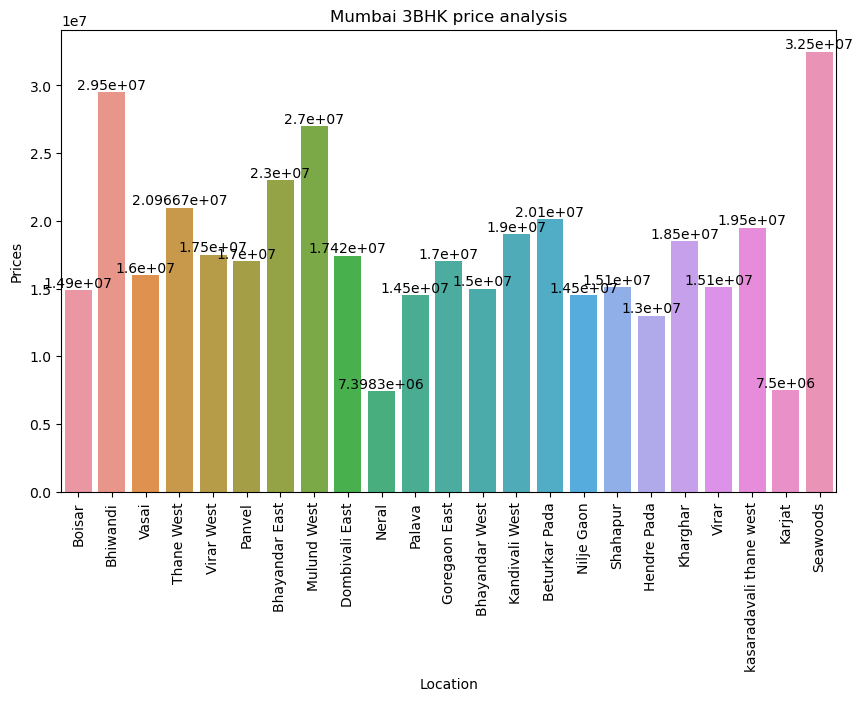

In [65]:
plt.figure(figsize=(10,6))
plot=sns.barplot(x='Location',y='Prices',data=df4,ci=None)
for label in plot.containers:
    plot.bar_label(label)
    

plt.title("Mumbai 3BHK price analysis")
plt.xticks(rotation=90)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


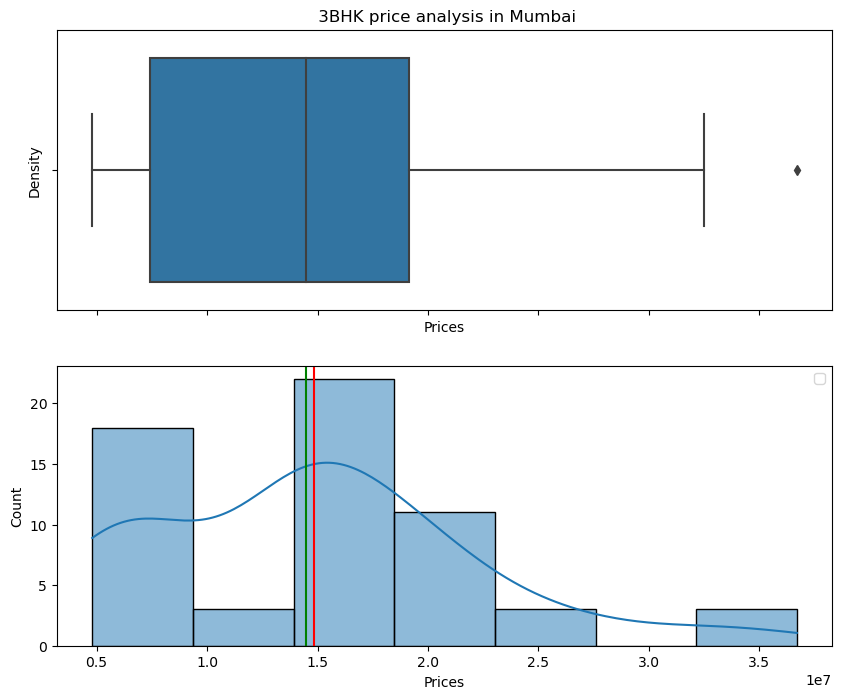

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)


sns.boxplot(x=df4['Prices'],ax=axes[0])
axes[0].set_xlabel('Prices')
axes[0].set_ylabel('Density')
axes[0].set_title('3BHk price analysis in mumbai')


sns.histplot(data=df4, x='Prices', kde=True,ax=axes[1])
axes[0].set_ylabel('Density')
axes[0].set_title(' 3BHK price analysis in Mumbai')
axes[0].tick_params(axis='x', rotation=90)

plt.axvline(df4['Prices'].mean(),color='red')
plt.axvline(df4['Prices'].median(),color='green')
plt.legend()


<Axes: xlabel='Prices', ylabel='Count'>

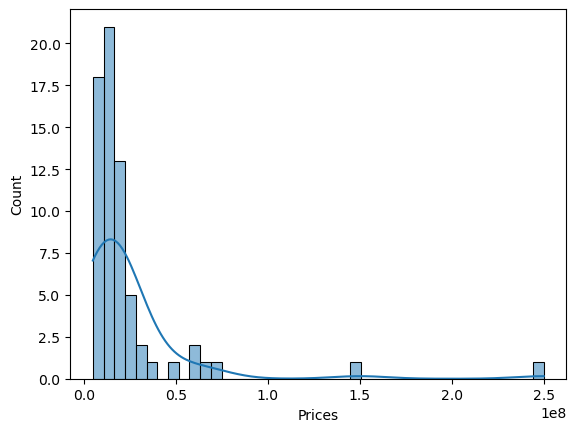

In [67]:
sns.histplot(data=y[flt4],x='Prices',kde=True)

In [68]:
y[flt4]['Prices'].max()

250000000

In [69]:
y[flt4]['Prices'].median()

15000000.0

In [70]:
y[flt4]['Prices'].min()

4800000

Text(0.5, 1.0, '3BHK price analysis in Mumbai ')

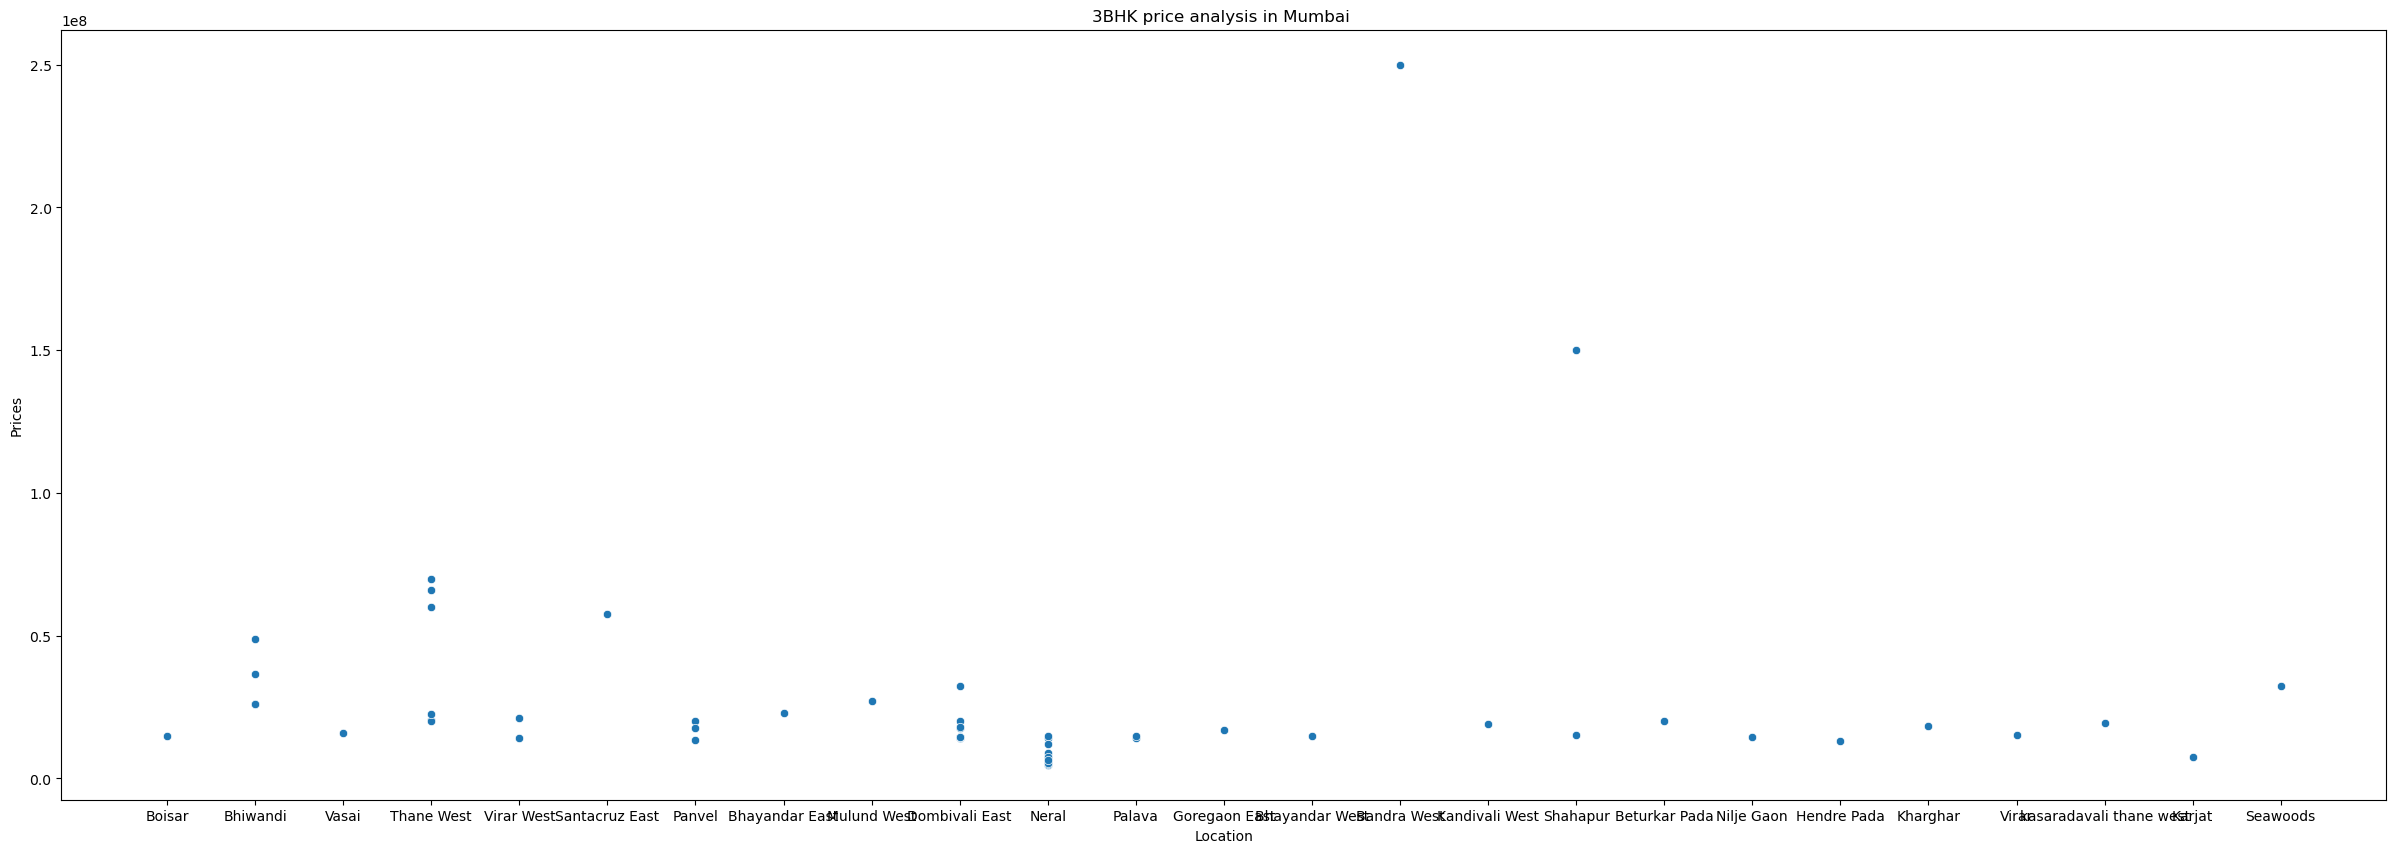

In [71]:
plt.figure(figsize=(30,10))
sns.scatterplot(data=y[flt4],y='Prices',x='Location')
plt.title('3BHK price analysis in Mumbai ')


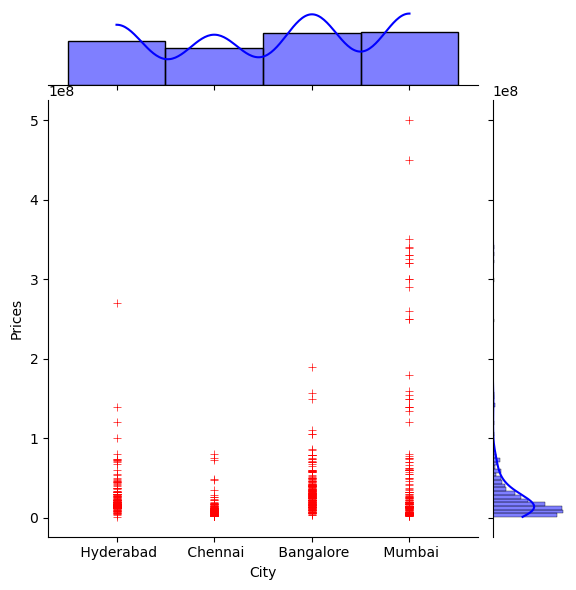

In [72]:
sns.jointplot(data=dfsb,x='City',y='Prices'
             ,joint_kws=dict(marker='+',
                            color='red')
             ,marginal_kws=dict(color='blue',kde='True'))

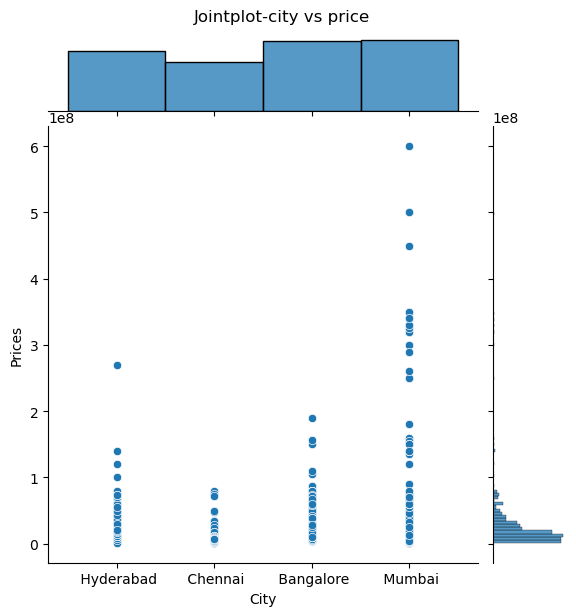

In [73]:
sns.jointplot(data = df,x=df['City'],y=df['Prices'])
plt.suptitle('Jointplot-city vs price',y=1.02)
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_18652\3803735512.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),annot=True)


<Axes: >

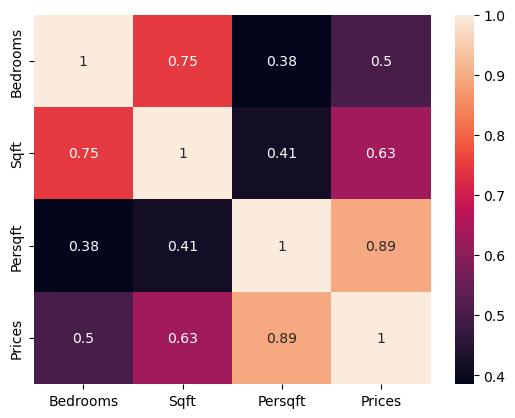

In [74]:
sns.heatmap(data=df.corr(),annot=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_18652\2894434677.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df,x='Bedrooms',shade = True,hue = df['City'])


<Axes: xlabel='Bedrooms', ylabel='Density'>

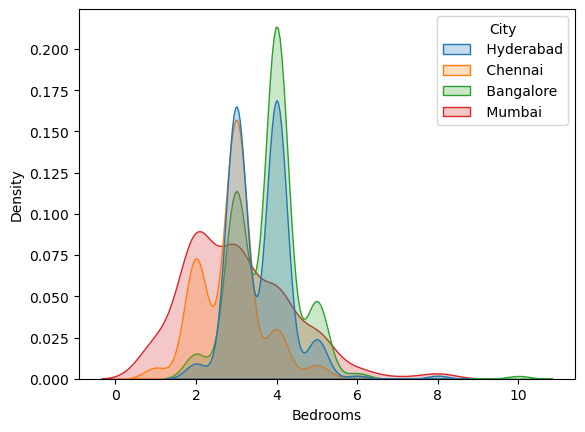

In [75]:
sns.kdeplot(data = df,x='Bedrooms',shade = True,hue = df['City'])

<Axes: xlabel='Bedrooms', ylabel='Prices'>

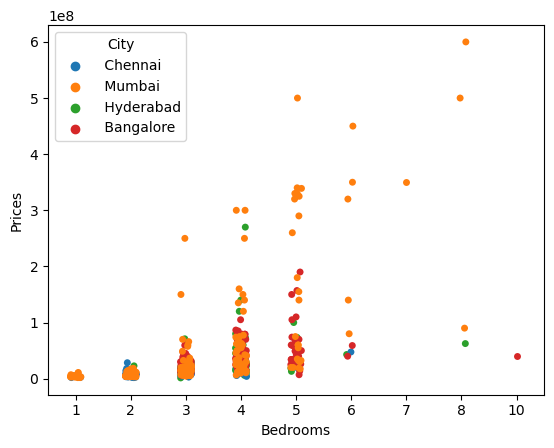

In [76]:
sns.stripplot(hue=df['City'],y=df['Prices'],x=df['Bedrooms'])

D:\anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 25.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Cities with sqfts  of villas')

D:\anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 27.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 34.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


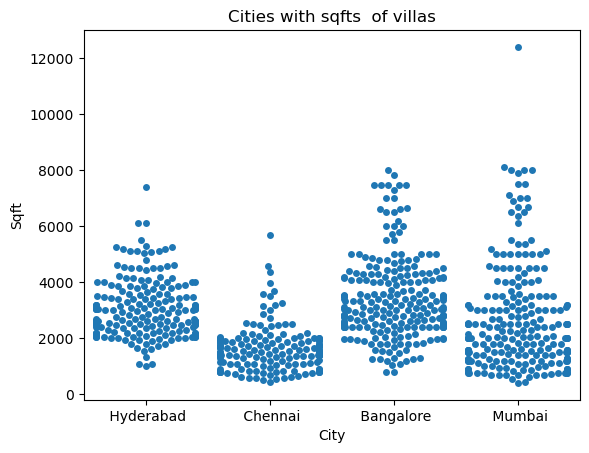

In [77]:
sns.swarmplot(y=df['Sqft'],x=df['City'])
plt.title('Cities with sqfts  of villas')

In [78]:
dfdp=dfsb[dfsb['Persqft']<15000]
dfdp

,Bedrooms,Sqft,Status,Persqft,Prices,Location,City
0,4,1930,Under Construction,7700,14800000,Patancheru,Hyderabad
1,4,4157,Under Construction,7200,29900000,Tukkuguda,Hyderabad
2,4,3400,Under Construction,12000,40800000,Bachupally,Hyderabad
3,4,2701,Under Construction,5200,14000000,Maheshwaram,Hyderabad
4,4,6125,Under Construction,12000,73500000,Mamidipally,Hyderabad
...,...,...,...,...,...,...,...
841,2,900,Ready to move,4223,3800000,Neral,Mumbai
842,3,1800,Ready to move,3611,6500000,Neral,Mumbai
843,2,1111,Under Construction,3915,4350000,Neral,Mumbai
844,2,1850,Ready to move,6756,12500000,Kharghar,Mumbai


D:\anaconda\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:b'` for same effect.
  warnings.warn(msg, FutureWarning)


([<matplotlib.axis.YTick at 0x2544dd3cfd0>,
 [Text(0, 1000.0, '1000'),
  Text(0, 1375.0, '1375'),
  Text(0, 1750.0, '1750'),
  Text(0, 2125.0, '2125'),
  Text(0, 2500.0, '2500'),
  Text(0, 2875.0, '2875'),
  Text(0, 3250.0, '3250'),
  Text(0, 3625.0, '3625'),
  Text(0, 4000.0, '4000'),
  Text(0, 4375.0, '4375'),
  Text(0, 4750.0, '4750'),
  Text(0, 5125.0, '5125'),
  Text(0, 5500.0, '5500'),
  Text(0, 5875.0, '5875'),
  Text(0, 6250.0, '6250'),
  Text(0, 6625.0, '6625'),
  Text(0, 7000.0, '7000'),
  Text(0, 7375.0, '7375'),
  Text(0, 7750.0, '7750'),
  Text(0, 8125.0, '8125'),
  Text(0, 8500.0, '8500'),
  Text(0, 8875.0, '8875'),
  Text(0, 9250.0, '9250'),
  Text(0, 9625.0, '9625'),
  Text(0, 10000.0, '10000')])

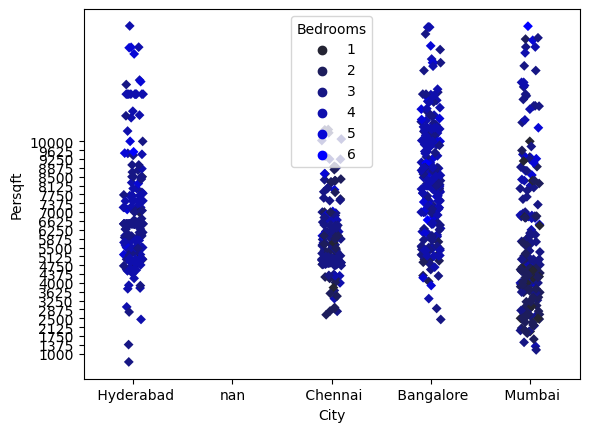

In [79]:
sns.stripplot(y=dfsb['Persqft'],x=dfdp['City'],hue = dfsb['Bedrooms'],color='b',jitter=0.1,marker='D')
tick_start = 1000
tick_end = 10000
num_ticks = 25
tick_values = np.linspace(tick_start, tick_end, num_ticks)
plt.yticks(tick_values)

D:\anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 62.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 73.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 63.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


([<matplotlib.axis.YTick at 0x2544ed6e140>,
 [Text(0, 0.0, '0'),
  Text(0, 3913.0434782608695, '3913'),
  Text(0, 7826.086956521739, '7826'),
  Text(0, 11739.130434782608, '11739'),
  Text(0, 15652.173913043478, '15652'),
  Text(0, 19565.217391304348, '19565'),
  Text(0, 23478.260869565216, '23478'),
  Text(0, 27391.304347826088, '27391'),
  Text(0, 31304.347826086956, '31304'),
  Text(0, 35217.391304347824, '35217'),
  Text(0, 39130.434782608696, '39130'),
  Text(0, 43043.47826086957, '43043'),
  Text(0, 46956.52173913043, '46957'),
  Text(0, 50869.565217391304, '50870'),
  Text(0, 54782.608695652176, '54783'),
  Text(0, 58695.65217391304, '58696'),
  Text(0, 62608.69565217391, '62609'),
  Text(0, 66521.73913043478, '66522'),
  Text(0, 70434.78260869565, '70435'),
  Text(0, 74347.82608695653, '74348'),
  Text(0, 78260.86956521739, '78261'),
  Text(0, 82173.91304347826, '82174'),
  Text(0, 86086.95652173914, '86087'),
  Text(0, 90000.0, '90000')])

D:\anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 64.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 75.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 65.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 15.7% of the points cannot be placed; you may want to decrease the size of the marke

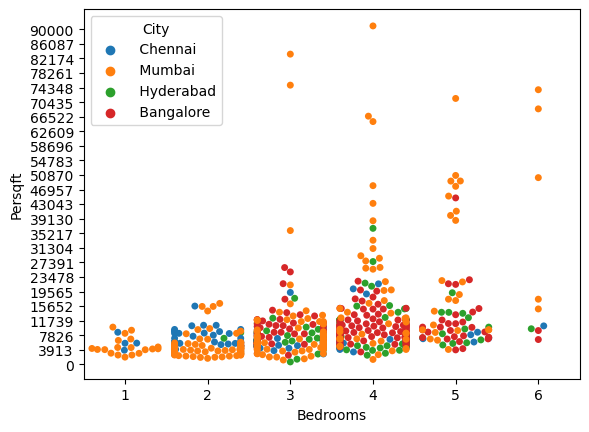

In [80]:
sns.swarmplot(y=dfsb['Persqft'],x=dfsb['Bedrooms'],hue=dfsb['City'])
tick_start = 0
tick_end = 90000
num_ticks = 24
tick_values = np.linspace(tick_start, tick_end, num_ticks)

# Set the tick values on the y-axis
plt.yticks(tick_values)

In [81]:
avgcost = df.groupby('City')['Prices'].mean().sort_values(ascending=False)[:5].round(2)
avgcost

City
 Mumbai       49151033.04
 Bangalore    33559131.32
 Hyderabad    25578108.86
 Chennai      11088880.22
Name: Prices, dtype: float64

C:\Users\Asus\AppData\Local\Temp\ipykernel_18652\517169332.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  plot=sns.barplot(x='City',y='Prices',data=dfsb,ci = None,hue=dfsb['Bedrooms'])


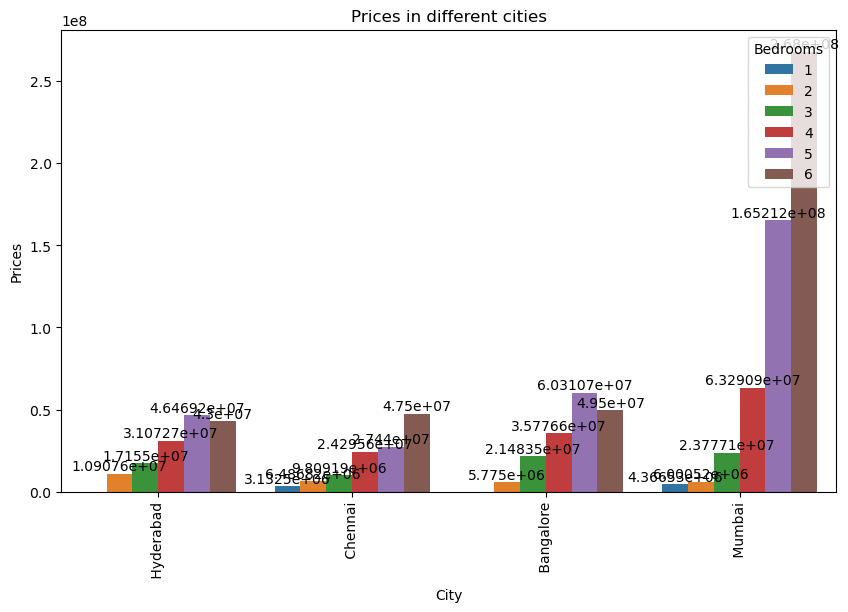

In [82]:
plt.figure(figsize=(10,6))
plot=sns.barplot(x='City',y='Prices',data=dfsb,ci = None,hue=dfsb['Bedrooms'])
for label in plot.containers:
    plot.bar_label(label)
plt.title("Prices in different cities")
plt.xticks(rotation=90)
plt.show()

In [83]:
avgcost = df.groupby('City')['Prices'].median().sort_values(ascending=False).round(2)
avgcost



City
 Bangalore    28100000.0
 Hyderabad    17550000.0
 Mumbai       14000000.0
 Chennai       8083000.0
Name: Prices, dtype: float64

C:\Users\Asus\AppData\Local\Temp\ipykernel_18652\3508257212.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Accent', annot=True)


<Axes: >

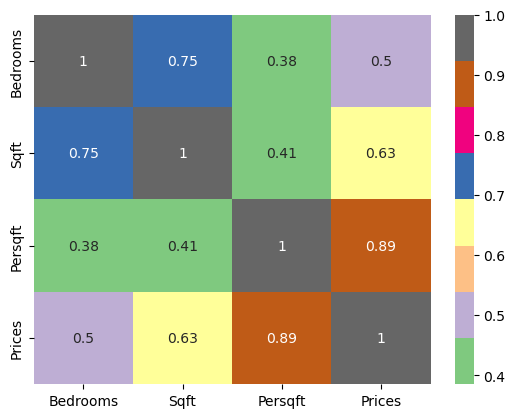

In [84]:
sns.heatmap(df.corr(), cmap='Accent', annot=True)

In [85]:
df8=dfsb[dfsb['Persqft'] <= 30000]
df8

,Bedrooms,Sqft,Status,Persqft,Prices,Location,City
0,4,1930,Under Construction,7700,14800000,Patancheru,Hyderabad
1,4,4157,Under Construction,7200,29900000,Tukkuguda,Hyderabad
2,4,3400,Under Construction,12000,40800000,Bachupally,Hyderabad
3,4,2701,Under Construction,5200,14000000,Maheshwaram,Hyderabad
4,4,6125,Under Construction,12000,73500000,Mamidipally,Hyderabad
...,...,...,...,...,...,...,...
842,3,1800,Ready to move,3611,6500000,Neral,Mumbai
843,2,1111,Under Construction,3915,4350000,Neral,Mumbai
844,2,1850,Ready to move,6756,12500000,Kharghar,Mumbai
845,3,3280,Ready to move,21341,70000000,Thane West,Mumbai


<Axes: xlabel='Prices', ylabel='City'>

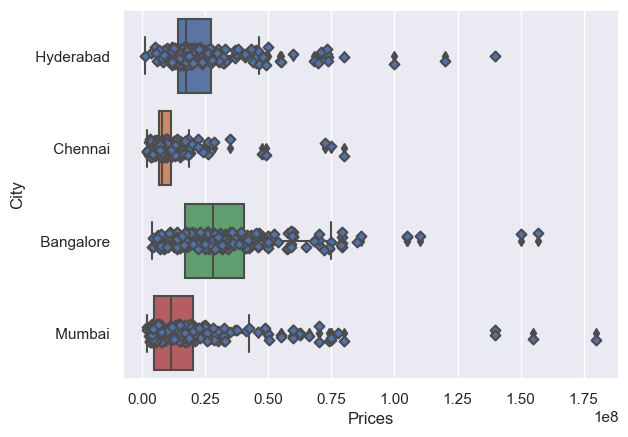

In [86]:
sns.set()

sns.stripplot(y='City',x='Prices',data=df8,jitter=0.1,linewidth=1.5,marker='D')
sns.boxplot(y='City',x='Prices',data=df8)



<Axes: xlabel='Prices', ylabel='City'>

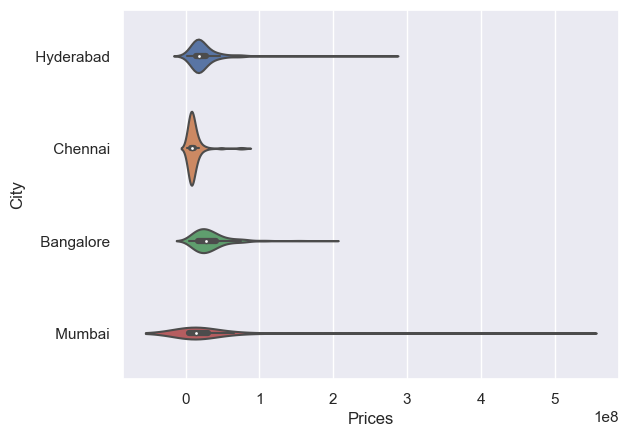

In [87]:
sns.violinplot(data=dfsb,x='Prices',y='City')

<Axes: xlabel='Prices', ylabel='Sqft'>

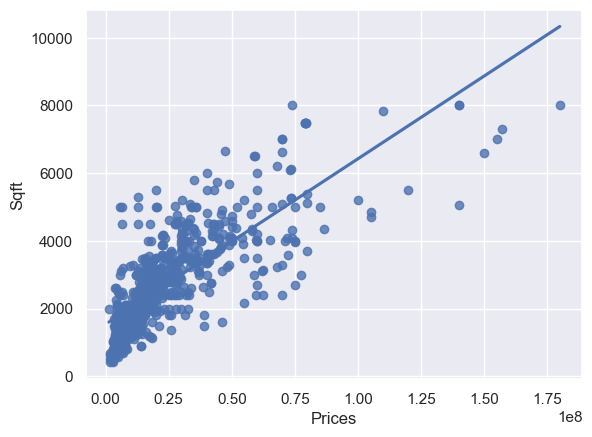

In [88]:
sns.regplot(data=df8,y=df8['Sqft'],x=df8['Prices'],scatter=True,ci=None)

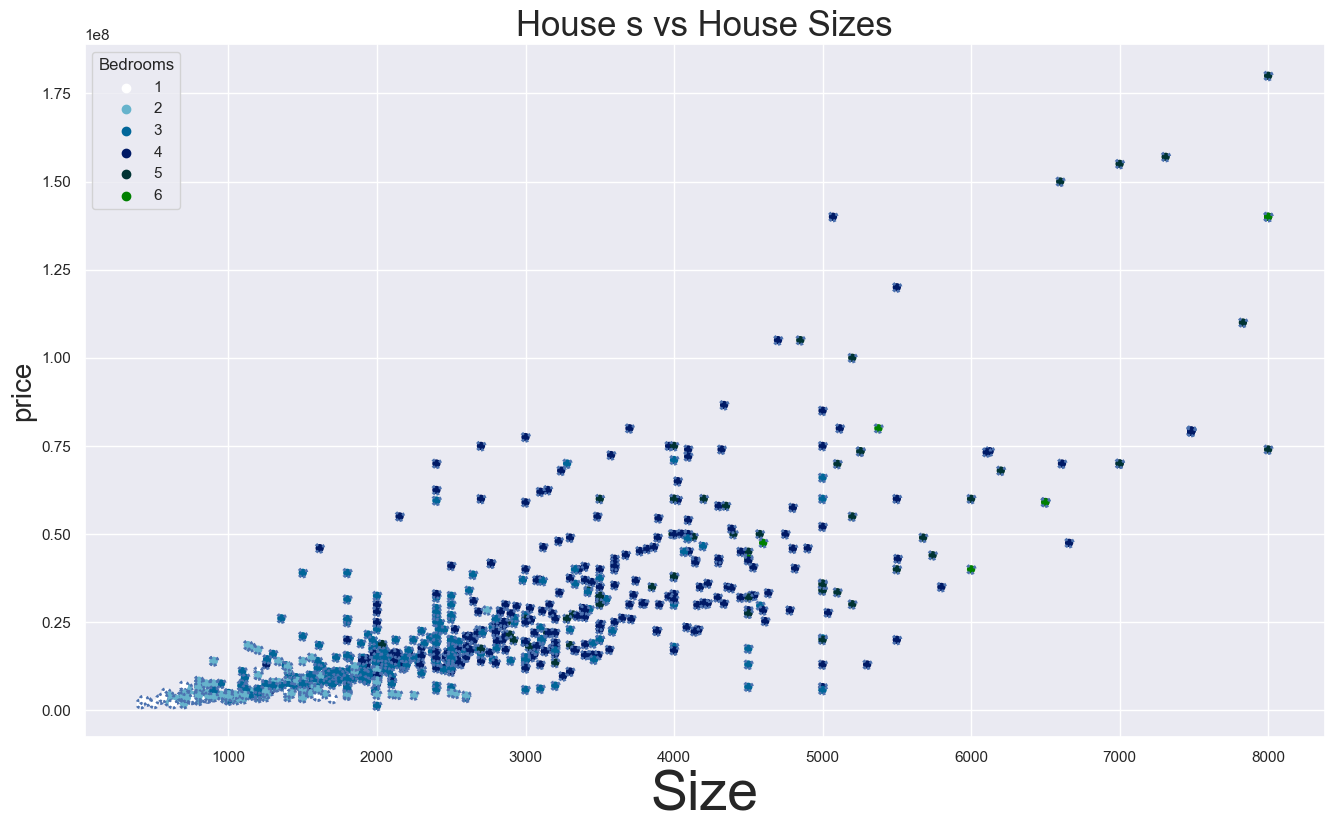

In [89]:
sns.set() #  set background 'darkgrid' 



plt.figure(figsize = (16,9)) # figure size in 16:9 ratio

# create scatter plot
kwargs  =   {'edgecolor':"b",
             'linewidth':2,
             'linestyle':':',
            }

sns.scatterplot(x = "Sqft", y = "Prices", data = df8, hue = "Bedrooms", palette = "ocean_r",
                sizes = (1000, 5000), **kwargs)

plt.title("House s vs House Sizes", fontsize = 25) # title of scatter plot
plt.xlabel("Size", fontsize = 40) # x-axis label
plt.ylabel("price", fontsize = 20) # y-axis label
plt.show() # show scatter plot

<Axes: xlabel='Sqft', ylabel='Prices'>

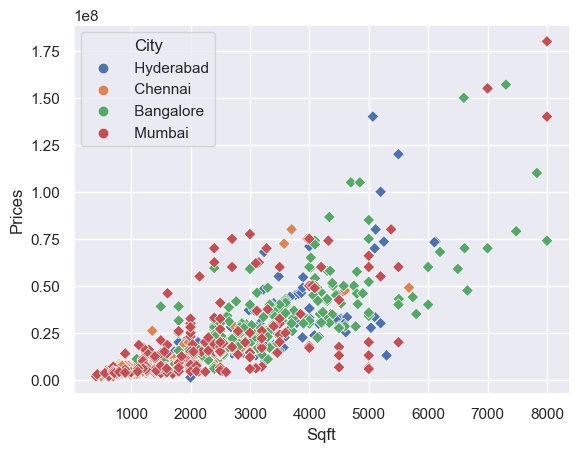

In [90]:
sns.scatterplot(x ='Sqft', y ='Prices',marker='D',data=df8,hue='City')